In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

**Understanding the problem:**

Problem: Shipping costs are increasing as a percentage of revenue despite a new UPS contract with better pricing.
Data: Two datasets with columns related to transactions, weights, charges, and locations.

**Potential Issues:**

Data Quality: Inconsistencies in weight, charges, or postal codes could affect analysis.

Missing Data: Missing values in any column might impact results.

Data Definition: Clear understanding of terms like "Entered Weight," "Billed Weight," and "Charge Description" is crucial.

In [92]:
df_2017 = pd.read_excel('Assessment Data1.xlsx',sheet_name ='Q2.2017')
df_2018 = pd.read_excel('Assessment Data1.xlsx',sheet_name ='Q2.2018')

In [93]:
df_2017.isnull().sum()

Invoice Date              0
Transaction Date          0
Package Quantity          0
Oversize Quantity         0
Tracking Number           3
Entered Weight            0
Billed Weight             0
Package Dimensions    49307
Zone                      3
Charge Description        1
Net Amount                0
Sender Postal          5742
Receiver Postal           3
Detail Keyed Dim      45668
dtype: int64

In [94]:
df_2018.isnull().sum()

Invoice Date              0
Transaction Date          0
Package Quantity          0
Oversize Quantity         0
Tracking Number           6
Entered Weight            0
Billed Weight             0
Package Dimensions    85599
Zone                     12
Charge Description        2
Net Amount                0
Sender Postal           381
Receiver Postal          12
Detail Keyed Dim      72928
dtype: int64

**Drop Detail Keyed Dim and Package Dimensions:**

Given the extremely high percentage of missing data, dropping these columns is advisable unless they are crucial to the analysis. If they are essential, I might need to find an alternative method to handle the missing data. these columns are unlikely to provide meaningful insights unless we can recover or accurately impute the missing data. 

Sender Postal might be important for zone-based cost analysis. However, with only 10% missing data, we might consider imputing the missing values rather than dropping the column entirely.



In [95]:
df_2018.columns.to_list()

['Invoice Date',
 'Transaction Date',
 'Package Quantity',
 'Oversize Quantity',
 'Tracking Number',
 'Entered Weight',
 'Billed Weight',
 'Package Dimensions',
 'Zone',
 'Charge Description',
 'Net Amount',
 'Sender Postal',
 'Receiver Postal',
 'Detail Keyed Dim']

In [96]:
cols_to_drop = [
    'Invoice Date',
    #'Transaction Date',
    'Package Quantity',
    'Oversize Quantity',
    #'Tracking Number',
    #'Entered Weight',
    #'Billed Weight',
    'Package Dimensions',
    'Zone',
    #'Charge Description',
    #'Net Amount',
    #'Sender Postal',
    #'Receiver Postal',
    'Detail Keyed Dim'
    ]

In [97]:
df_2017.drop(columns=cols_to_drop,inplace=True)
df_2017.dropna(inplace=True)
df_2017.set_index('Tracking Number', inplace=True)

df_2018.drop(columns=cols_to_drop,inplace=True)
df_2018.dropna(inplace=True)
df_2018.set_index('Tracking Number', inplace=True)

In [98]:
df_2017.shape

(44819, 7)

In [99]:
df_2018.shape

(86618, 7)

We can also drop Negative Net Amounts. These values often represent corrections, returns, or other outliers that do not accurately reflect the intended financial performance. By filtering out negative Net amounts, we can focus on analyzing actual revenue or income, which leads to more accurate insights and reliable projections.

In [100]:
df_2017[df_2017['Net Amount'] < 0].shape[0]

198

In [101]:
df_2018[df_2018['Net Amount'] < 0].shape[0]

1285

In [102]:
df_2017 = df_2017[~(df_2017['Net Amount'] < 0)]
df_2018 = df_2018[~(df_2018['Net Amount'] < 0)]

Handling outliers

In [103]:
from scipy import stats
df_2017 = df_2017[(np.abs(stats.zscore(df_2017['Entered Weight'])) < 3)]
df_2017 = df_2017[(np.abs(stats.zscore(df_2017['Billed Weight'])) < 3)]
df_2017 = df_2017[(np.abs(stats.zscore(df_2017['Net Amount'])) < 3)]

df_2018 = df_2018[(np.abs(stats.zscore(df_2018['Entered Weight'])) < 3)]
df_2018 = df_2018[(np.abs(stats.zscore(df_2018['Billed Weight'])) < 3)]
df_2018 = df_2018[(np.abs(stats.zscore(df_2018['Net Amount'])) < 3)]


Outlier detection is a crucial step in data analysis, as outliers can skew results and lead to incorrect conclusions. Instead of using z-scores, a more sophisticated method would be implementing a clustering algorithm for outlier detection. Clustering helps identify data points that deviate significantly from the majority, revealing potential outliers. This approach is advantageous, as it offers a comprehensive understanding of the data structure and may reveal interesting patterns or valuable insights that could otherwise be overlooked.
A clustering algorithm like DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can effectively detect outliers by classifying data points as either core points, border points, or outliers. By considering local density and proximity, DBSCAN provides a nuanced view of outliers, ensuring more accurate results.
Moreover, isolating outliers enables further analysis to understand their underlying causes and potential significance. These outliers may represent anomalies, errors, or unique instances that contribute to a deeper comprehension of the data and enhance the overall analysis.

In [104]:
df_2017.describe()

,Transaction Date,Entered Weight,Billed Weight,Net Amount,Receiver Postal
count,42161,42161.000000,42161.000000,42161.000000,42161.000000
mean,2017-07-30 04:39:35.465477632,1.730284,2.345129,2.284166,44772.539788
min,2017-06-19 00:00:00,0.000000,0.000000,0.000000,1001.000000
25%,2017-07-28 00:00:00,0.000000,0.000000,0.350000,16925.000000
50%,2017-07-31 00:00:00,0.000000,0.000000,1.870000,44092.000000
75%,2017-08-01 00:00:00,0.700000,2.000000,4.000000,72761.000000
max,2017-08-05 00:00:00,24.000000,24.000000,14.960000,99919.000000
std,NaN,4.177784,4.883236,2.392051,30288.578865


In [105]:
df_2018.describe()

,Transaction Date,Entered Weight,Billed Weight,Net Amount,Receiver Postal
count,80935,80935.000000,80935.000000,80935.000000,80935.000000
mean,2018-07-29 09:41:21.324519936,1.583342,2.216581,2.234402,39623.217323
min,2018-06-26 00:00:00,0.000000,0.000000,0.000000,1002.000000
25%,2018-07-27 00:00:00,0.000000,0.000000,0.400000,12566.000000
50%,2018-07-30 00:00:00,0.000000,0.000000,1.750000,33455.000000
75%,2018-07-31 00:00:00,0.000000,2.000000,4.800000,60487.000000
max,2018-08-04 00:00:00,23.000000,23.000000,23.610000,99925.000000
std,NaN,4.021379,4.996406,2.490292,29147.070165


In [106]:
metrics_2017 = df_2017.groupby('Transaction Date')[['Net Amount', 'Entered Weight', 'Billed Weight']].sum()
metrics_2018 = df_2018.groupby('Transaction Date')[['Net Amount', 'Entered Weight', 'Billed Weight']].sum()

In [107]:
percentage_change = (metrics_2018.mean() - metrics_2017.mean()) / metrics_2017.mean()*100
percentage_change

Net Amount        97.173463
Entered Weight    84.447248
Billed Weight     90.516066
dtype: float64

In [108]:
metrics_2017.reset_index(inplace=True)
metrics_2017.drop(columns=['Transaction Date'],inplace=True)
metrics_2018.reset_index(inplace=True)
metrics_2018.drop(columns=['Transaction Date'],inplace=True)

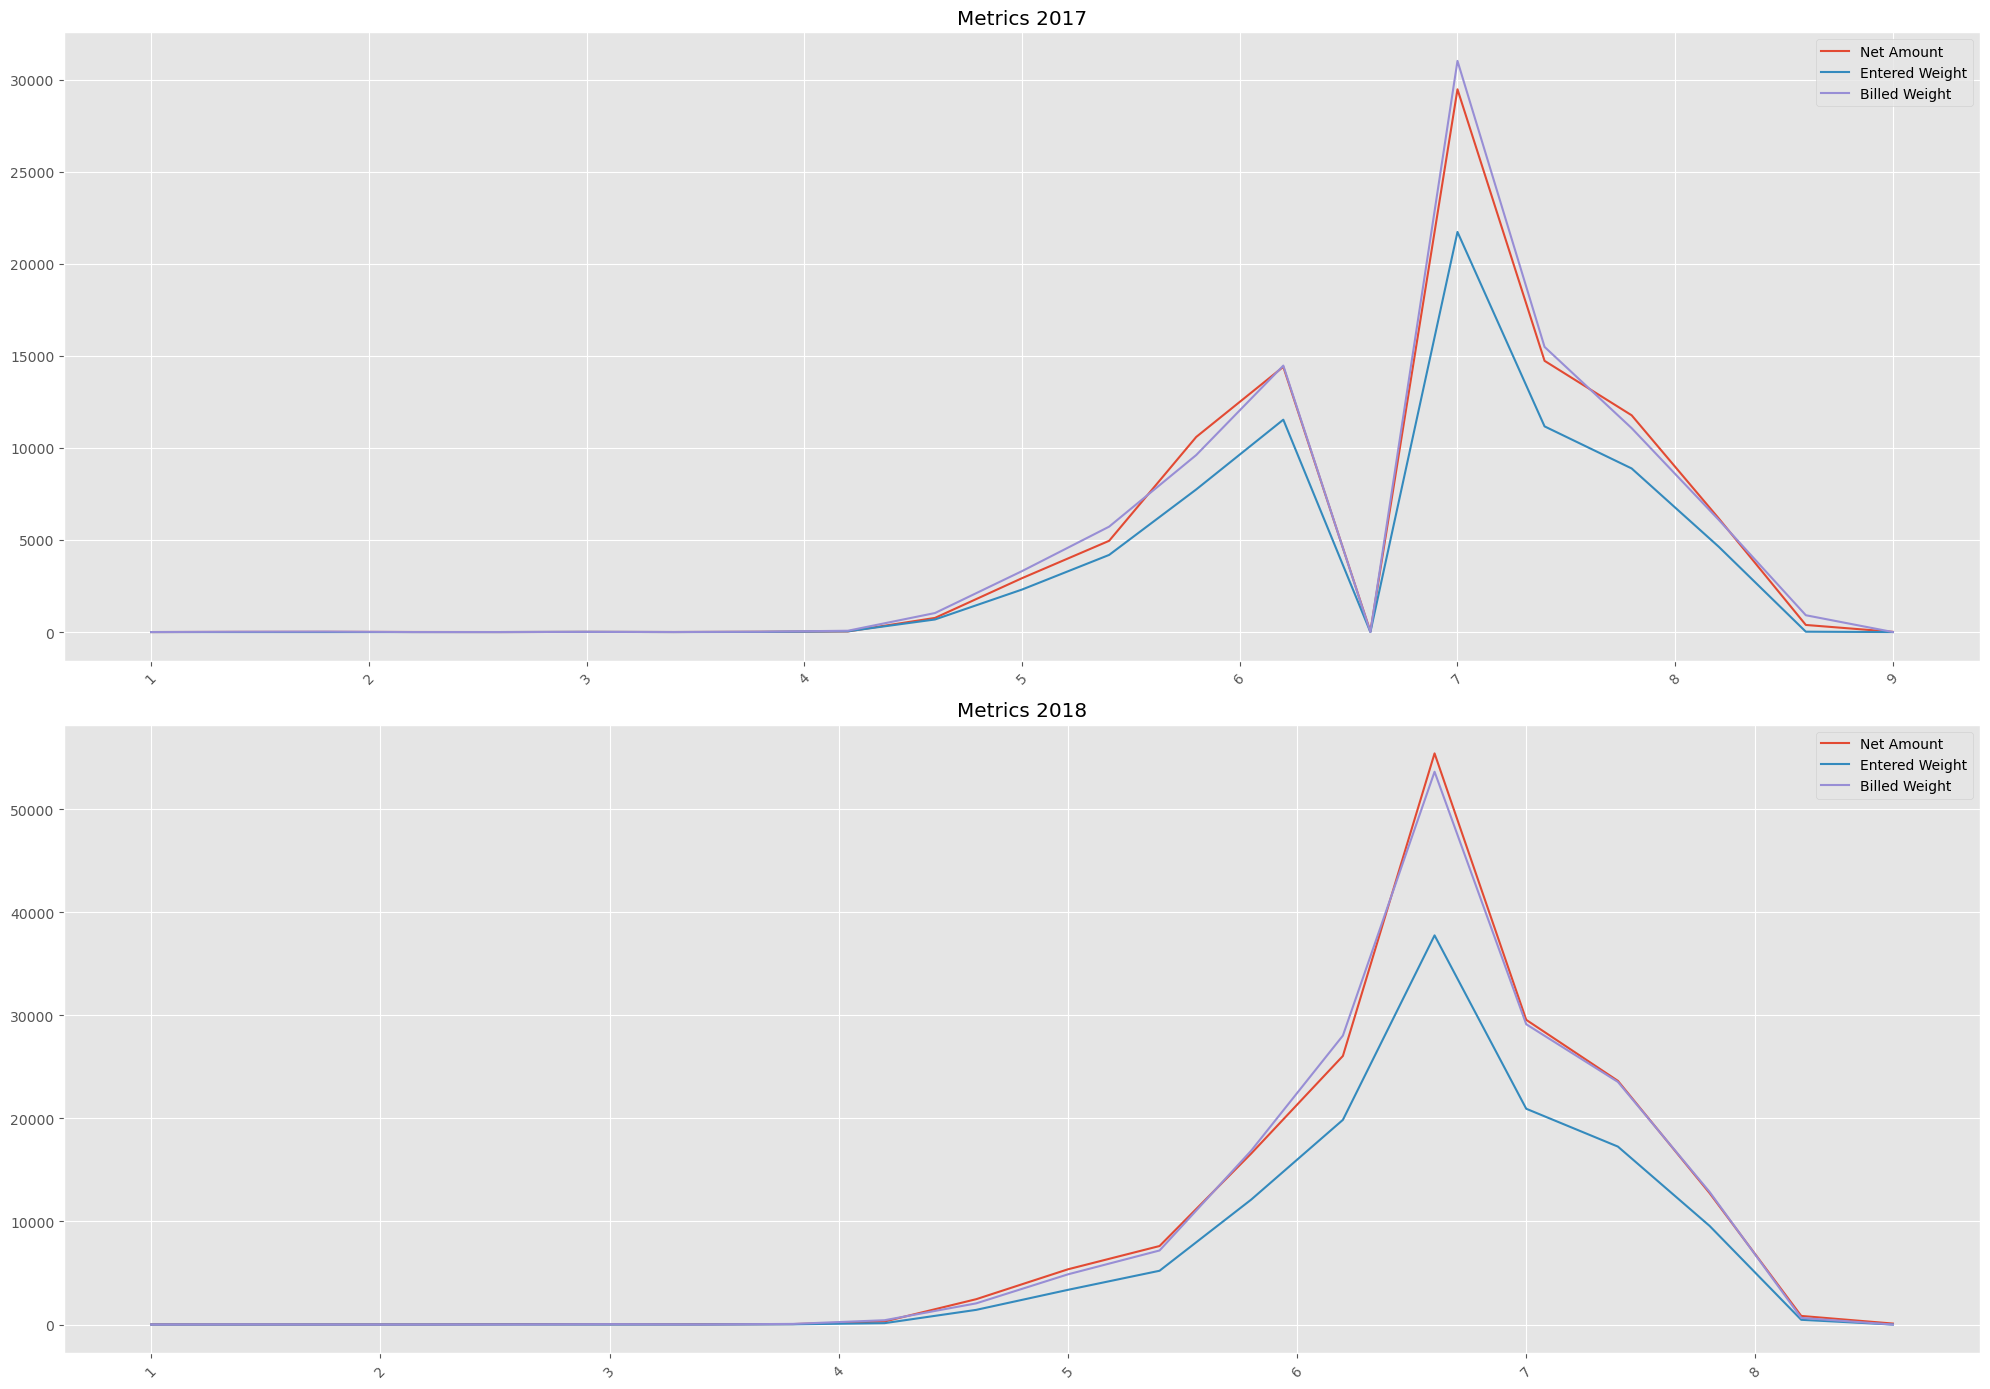

In [109]:
# Create a figure with 2 subplots (vertically stacked)
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

# Plot metrics_2017 on the first subplot
metrics_2017.plot(ax=axes[0], title="Metrics 2017", legend=True)

# Plot metrics_2018 on the second subplot
metrics_2018.plot(ax=axes[1], title="Metrics 2018", legend=True)

# Adjust x-axis labels for readability
axes[0].set_xticklabels(metrics_2017.index,rotation=45)
axes[1].set_xticklabels(metrics_2018.index,rotation=45)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


### Interpretation

**Net Amount:**
The shipping costs (Net Amount) have increased significantly from 2017 to 2018 (97.17%). While this might be expected with rising shipping volumes, it should ideally be in line with revenue growth.

**Entered Weight and Billed Weight:**
Both the entered and billed weights have also increased substantially (84.45% and 90.52%, respectively). This suggests a possible increase in shipment volume.

### Potential Reasons for These Results

**Increased Shipment Volume:**
The parallel increase in entered and billed weights implies that the company might have shipped more goods in 2018. This could naturally lead to higher shipping costs, but it's essential to check whether the increase in shipping volume is proportionate to revenue growth.

**Contract and Pricing Changes:**
Despite a new contract with UPS, the nearly identical increase in both net amount and billed weight suggests that the pricing per weight unit may not have decreased as expected. This could be due to:

**Surcharges or additional fees:**
The new contract might include surcharges (e.g., fuel surcharges, residential delivery fees) that offset the base rate reductions.
Changes in the dimensional weight calculation: If the method for calculating billed weight changed (e.g., a different dimensional weight divisor), this could lead to higher billed weights and thus higher costs.

**Weight Discrepancies:**
Although both entered and billed weights increased significantly, the near-equal percentage increases suggest there hasn't been a significant change in how weight discrepancies are handled. However, if there were substantial discrepancies, they could contribute to the higher costs

To better understand the impact of the increased shipping costs, it's crucial to analyze revenue data alongside these metrics. Calculate the revenue growth from 2017 to 2018 and compare it to the increase in shipping costs to evaluate if they're proportional.If revenue growth doesn't align with the shipping cost increase, consider revisiting the UPS contract to identify any hidden fees or surcharges and renegotiate terms as necessary.Examine the weight discrepancies between entered and billed weights to identify potential opportunities for cost savings through better handling or packaging practices.

In [110]:
df_2017.head()

,Transaction Date,Entered Weight,Billed Weight,Charge Description,Net Amount,Sender Postal,Receiver Postal
Tracking Number,,,,,,,
1Z6VY3400377024016,2017-08-03,16.0,16,Ground Commercial Collect,5.66,08691 2342,8512.0
1Z6VY3400377024016,2017-08-03,0.0,0,Fuel Surcharge,0.27,08691 2342,8512.0
1Z6VY3400377025195,2017-08-03,0.0,0,Fuel Surcharge,0.30,08691 2342,8512.0
1Z6VY3400377025239,2017-08-03,19.2,20,Ground Commercial Collect,5.66,08691 2342,8512.0
1Z6VY3400377025239,2017-08-03,0.0,0,Fuel Surcharge,0.27,08691 2342,8512.0


In [111]:
df_2018.head()

,Transaction Date,Entered Weight,Billed Weight,Charge Description,Net Amount,Sender Postal,Receiver Postal
Tracking Number,,,,,,,
1Z2342VF0346355801,2018-08-02,21.0,21,Ground Commercial Collect,9.30,49417 2180,89506.0
1Z2342VF0346355801,2018-08-02,0.0,0,Addl. Handling longest side,4.80,49417 2180,89506.0
1Z2342VF0346355801,2018-08-02,0.0,0,Declared Value,2.70,49417 2180,89506.0
1Z2342VF0346355801,2018-08-02,0.0,0,Fuel Surcharge,0.54,49417 2180,89506.0
1Z2342VF0346355801,2018-08-02,0.0,0,Addl. Handling longest side,0.00,49417 2180,89506.0


In [115]:
# Calculating cost per weight
cost_per_weight_2017 = metrics_2017['Net Amount'] / metrics_2017['Billed Weight']
cost_per_weight_2017.replace([np.inf, -np.inf], np.nan, inplace=True)
cost_per_weight_2017.dropna(inplace=True)

cost_per_weight_2018 = metrics_2018['Net Amount'] / metrics_2018['Billed Weight']
cost_per_weight_2018.replace([np.inf, -np.inf], np.nan, inplace=True)
cost_per_weight_2018.dropna(inplace=True)


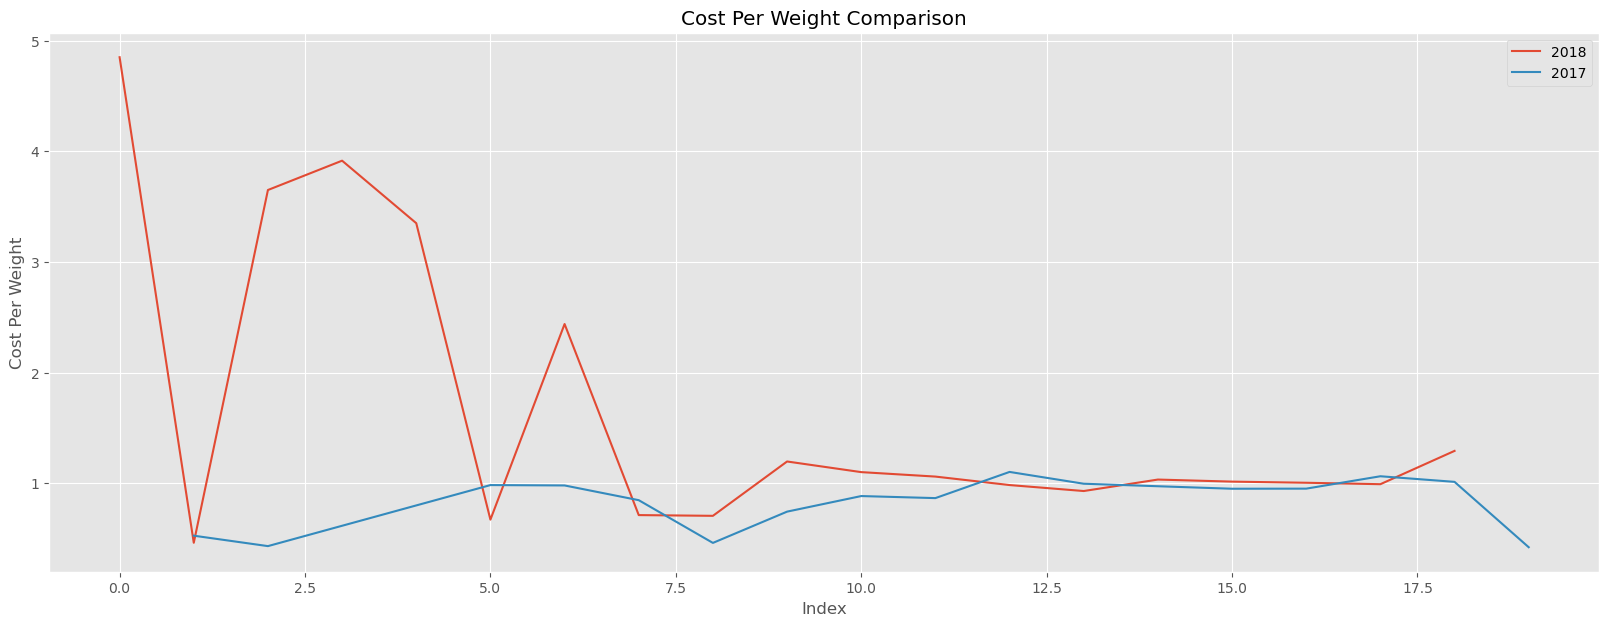

In [131]:
plt.figure(figsize=(20, 7))
cost_per_weight_2018.plot(label='2018')
cost_per_weight_2017.plot(label='2017')
plt.legend()
plt.title('Cost Per Weight Comparison')
plt.xlabel('Index')
plt.ylabel('Cost Per Weight')
plt.show()

In [118]:
cost_per_weight_2017.mean()

0.8261321064499161

In [119]:
cost_per_weight_2018.mean()

1.6505327971827015

To test whether the cost_per_weight for 2017 and 2018 are statistically significantly different, you can use a two-sample t-test. This test is designed to compare the means of two independent samples to determine if they come from the same population.

Null Hypothesis (H0​): The means of cost_per_weight for 2017 and 2018 are equal.
Alternative Hypothesis (Ha​): The means of cost_per_weight for 2018 is larger than 2017.

In [127]:
# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(cost_per_weight_2018, cost_per_weight_2017, equal_var=True)

# Output the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 2.4893394813475553
p-value: 0.01801439434306412


**Interpretation:**

The t-statistic value of 2.489 indicates that the mean cost_per_weight in 2017 is moderately higher than in 2018, as a larger t-statistic implies a greater difference between the means. The p-value of 0.018 suggests that there is a statistically significant difference between the cost_per_weight in 2017 and 2018, as the probability of observing such a difference under the null hypothesis (i.e., assuming no actual difference) is only 1.8%.

**Effect Size:**

To evaluate the practical significance of this difference, it is helpful to calculate an effect size, such as Cohen's d. If Cohen's d is found to be around 0.5, this indicates a medium effect size, suggesting that the difference between the cost_per_weight in 2017 and 2018 may have practical implications.

**Potential Implications:**

If the difference in cost_per_weight between the two years is statistically significant and has a medium effect size, it might be important for the company or organization to investigate the factors that contributed to this change. For example, potential causes could be changes in operational costs, efficiency improvements, or fluctuations in market conditions. Understanding these factors may help the organization to identify areas for improvement or to capitalize on successful strategies.

**Assumptions:**

The t-test relies on certain assumptions, such as normality and equal variances. If the data does not meet these assumptions, the results may be less reliable. In such cases, it would be advisable to consider alternative statistical tests, such as non-parametric tests like the Mann-Whitney U test, to validate the findings.

**Follow-up Actions:**

To better understand the factors driving the difference in cost_per_weight, further analysis could be conducted, such as segmenting the data by product type, region, or other relevant factors. Additionally, it may be beneficial to monitor cost_per_weight trends over a longer time period to identify patterns or cyclical changes.


### Reasons for Increasing Shipping Costs:
There could be several reasons for the increase in shipping costs as a percentage of revenue:

**Higher Average Shipping Cost per Package:** 
The average shipping cost per package might have increased due to changes in factors such as package dimensions, weights, destination zones, or surcharges. Further analysis of package-level data could help identify if these factors contributed to the increase in shipping costs.

**Increased Percentage of Expedited Shipments:**
If customers opted for faster delivery methods more often in 2018, this could lead to higher shipping costs as a percentage of revenue. Examining the proportion of expedited shipments in both years can help determine if this was a factor.



### Identifying Areas of Opportunity:
Given the limited information, potential approaches to identify areas of opportunity for decreasing shipping costs could include:

**Negotiating Shipping Rates:** 
Review the existing shipping contracts with carriers like UPS and explore opportunities to negotiate better rates based on shipment volumes, service levels, and other factors.

**Analyzing Package Dimensions and Weights:** Review package-level data to identify opportunities for reducing package dimensions or weights, which can help lower shipping costs.

**Optimizing Warehouse Distribution:** 
Analyze the distribution of shipments between warehouses and assess whether adjusting the allocation of inventory or shipping volumes could result in lower overall shipping costs.

**Reviewing Packaging Materials and Processes:** 
Evaluate the types of packaging materials used and packaging processes to identify potential cost-saving opportunities.

These approaches could help to uncover areas of opportunity for reducing shipping costs and improving overall efficiency. However, gathering additional data and conducting a more in-depth analysis would be necessary to make specific recommendations.